In [221]:
# ================================
# 1. Core libraries & settings
# ================================
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# (optional) nicer table display inside notebooks
pd.set_option("display.max_columns", None)  # show every column
sns.set_theme(style="whitegrid", palette="viridis")  # global seaborn theme
%matplotlib inline


In [223]:
# ================================
# 2. Load & inspect the dataset
# ================================
# Replace with your actual file or SQL query
df = pd.read_csv("garments_worker_productivity.csv")

# Quick structural checks
display(df.head())
df.info()          # dtypes, non‑null counts
df.describe()      # numeric summary (mean, std, min, etc.)


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


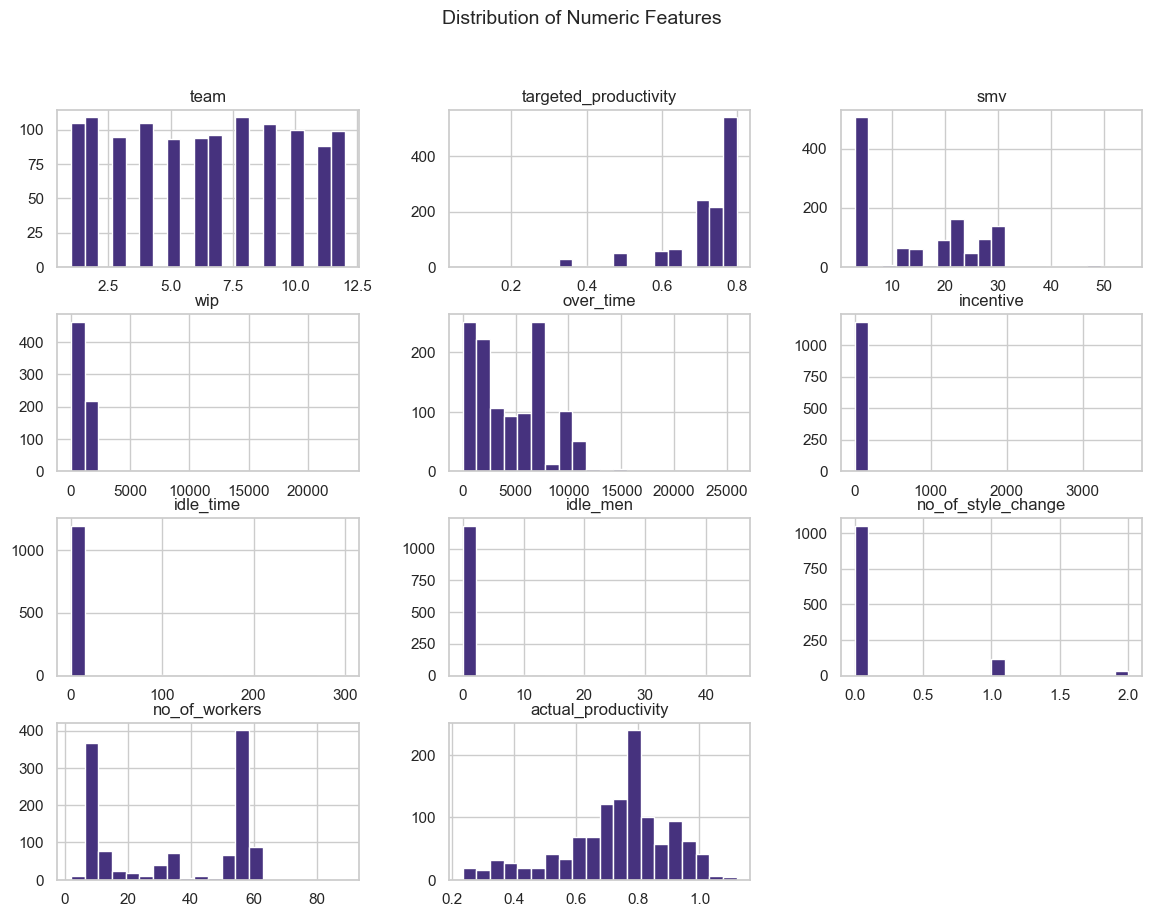

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


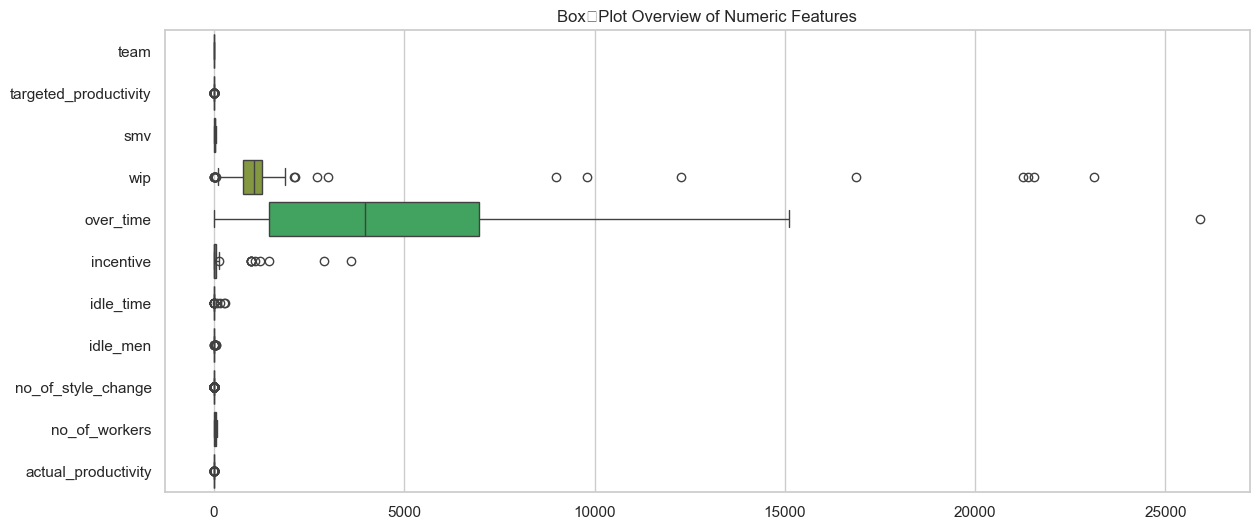

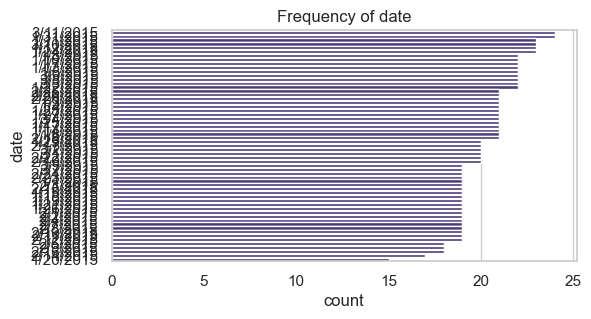

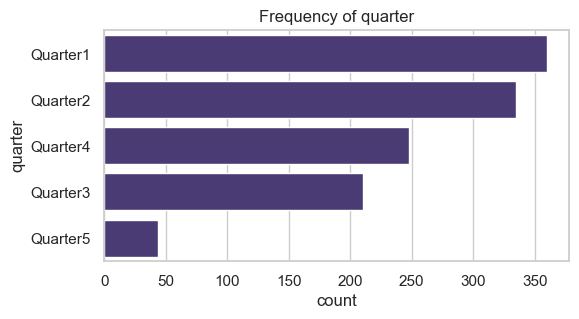

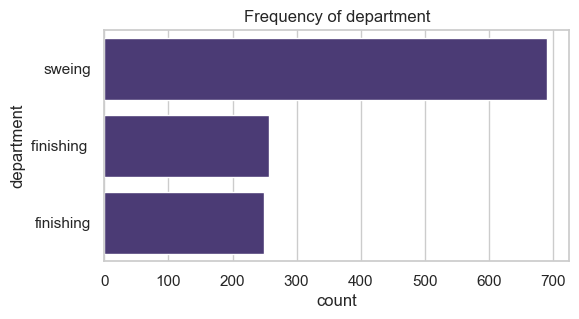

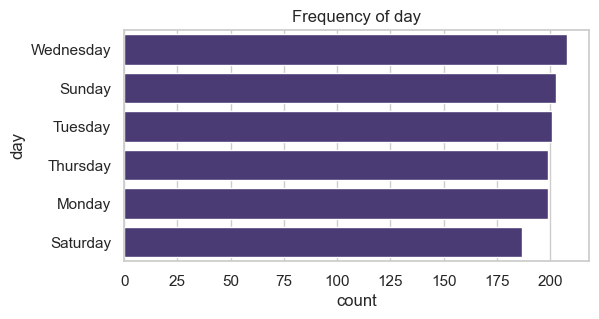

In [225]:
# ============================================
# 3. Descriptive (Univariate) Visualizations
# ============================================
num_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(exclude="number").columns

# Histograms + KDE for numeric variables
df[num_cols].hist(bins=20, figsize=(14, 10))
plt.suptitle("Distribution of Numeric Features", fontsize=14)
plt.show()

# Box plots to spot outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[num_cols], orient="h")
plt.title("Box‑Plot Overview of Numeric Features")
plt.show()

# Bar charts for categorical frequencies
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Frequency of {col}")
    plt.show()


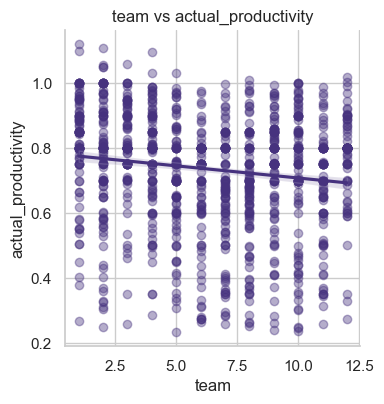

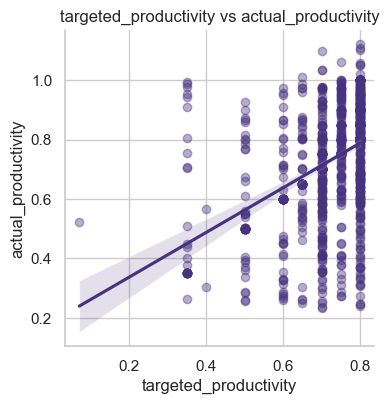

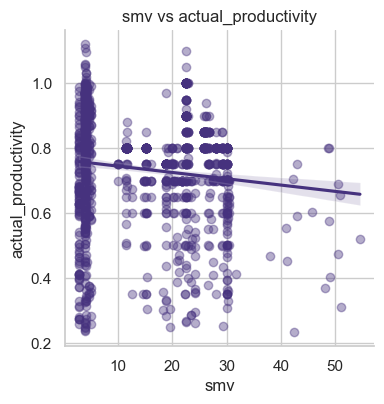

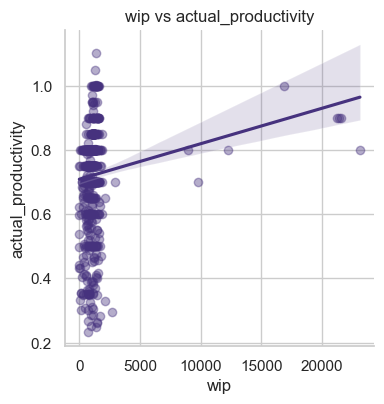

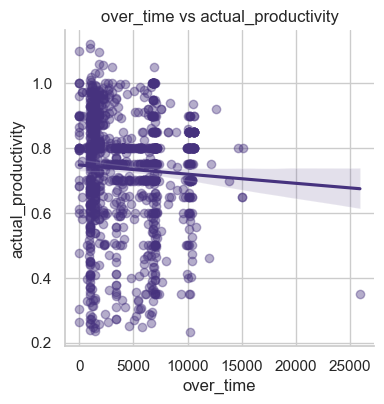

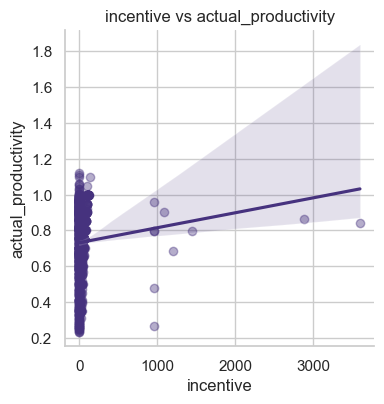

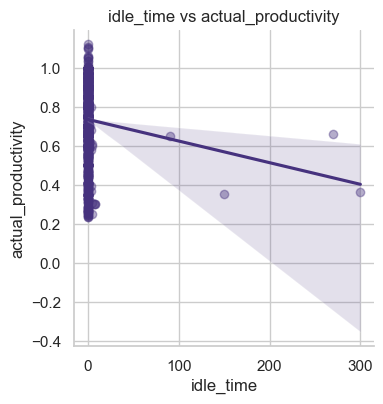

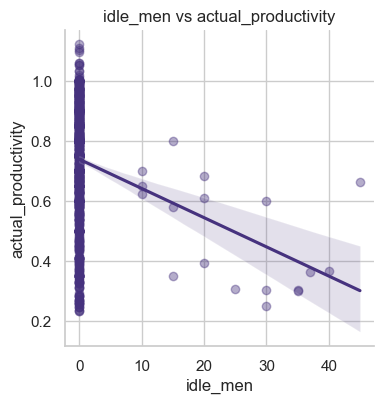

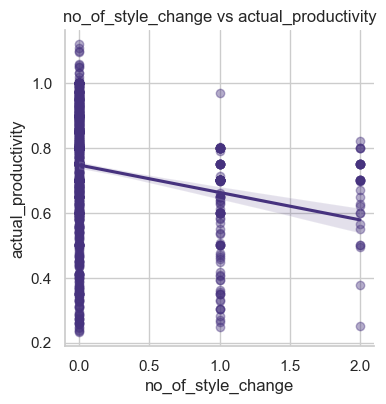

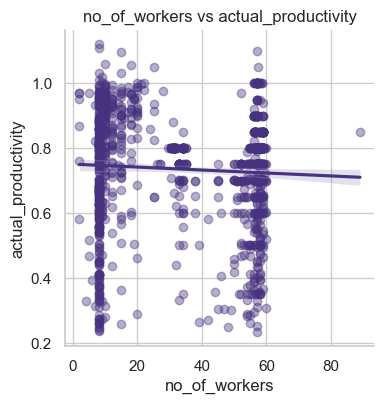

In [226]:
# ============================================
# 4. Bivariate Descriptive Analysis
#    (target vs. individual features)
# ============================================
target = "actual_productivity"        # change to your target column

# If target is numeric → boxplots / scatter
if pd.api.types.is_numeric_dtype(df[target]):
    for col in num_cols.drop(target):
        sns.lmplot(x=col, y=target, data=df, height=4, scatter_kws={"alpha":0.4})
        plt.title(f"{col} vs {target}")
        plt.show()
# If target is categorical → violin / strip
else:
    for col in num_cols:
        plt.figure(figsize=(6, 4))
        sns.violinplot(x=target, y=col, data=df, inner="quartile")
        plt.title(f"{col} distribution across {target}")
        plt.show()


In [227]:
def corr_sig(df_, cols):
    """
    Return a DataFrame with r and p‑values for every pair of given numeric columns.
    Skips pairs with missing or infinite values.
    """
    rows = []
    for i, col1 in enumerate(cols):
        for col2 in cols[i+1:]:
            # Drop NaN or Inf rows for this pair
            clean_data = df_[[col1, col2]].replace([np.inf, -np.inf], np.nan).dropna()

            # Skip if not enough data
            if len(clean_data) < 3:
                continue

            r, p = stats.pearsonr(clean_data[col1], clean_data[col2])
            rows.append({
                "Feature_A": col1,
                "Feature_B": col2,
                "r": round(r, 3),
                "p_value": round(p, 5)
            })

    return pd.DataFrame(rows).sort_values("p_value")


In [228]:
print(df[num_cols].isnull().sum())


team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


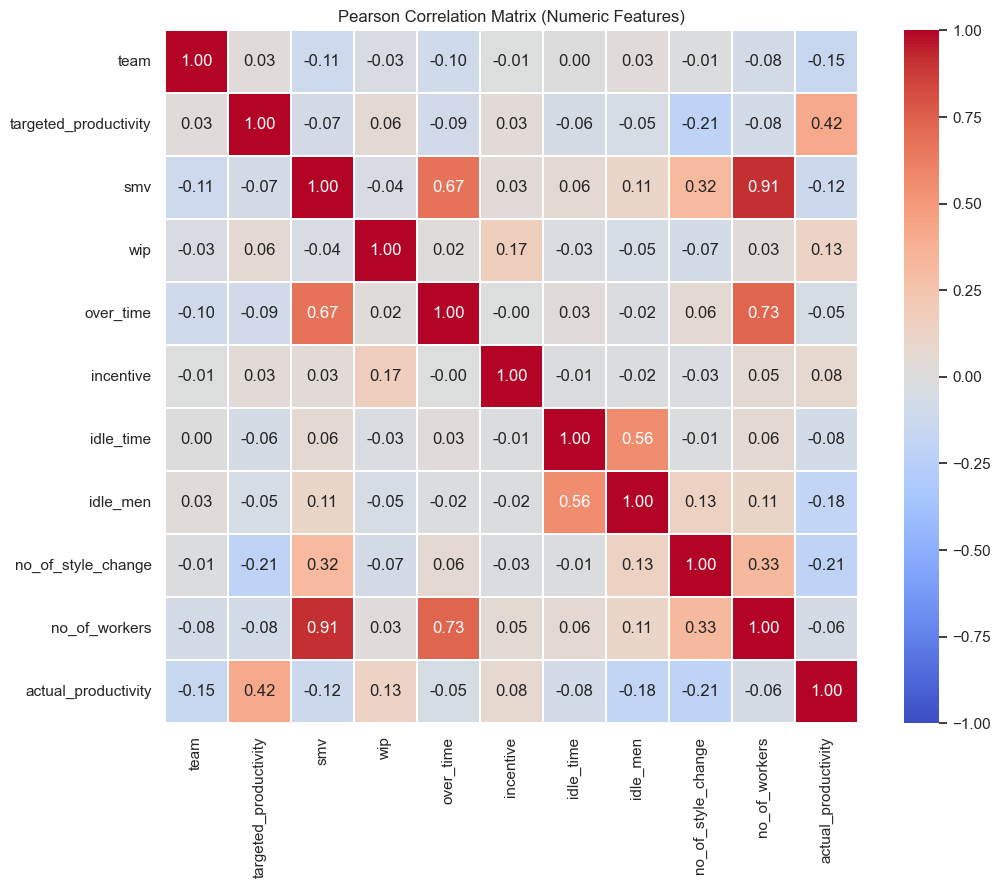

In [229]:
# ================================
# 5. Correlation Analysis
# ================================
# --- 5.1 numeric‑numeric correlation matrix + heatmap ----
corr_matrix = df[num_cols].corr(method="pearson")

plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            vmin=-1, vmax=1, linewidths=0.3, square=True)
plt.title("Pearson Correlation Matrix (Numeric Features)")
plt.show()

# --- 5.2 statistical significance (optional) -------------

import numpy as np
import pandas as pd
from scipy import stats

def corr_sig(df_, cols):
    """
    Return a DataFrame with r and p‑values for every pair of given columns,
    after removing NaN or Inf values from the pair.
    """
    rows = []
    for i, col1 in enumerate(cols):
        for col2 in cols[i+1:]:
            # Select only the two columns
            data_pair = df_[[col1, col2]].copy()
            
            # Replace inf/-inf with NaN and drop all rows with NaN
            data_pair.replace([np.inf, -np.inf], np.nan, inplace=True)
            data_pair.dropna(inplace=True)
            
            # Ensure at least 2 data points remain
            if len(data_pair) >= 2:
                r, p = stats.pearsonr(data_pair[col1], data_pair[col2])
                rows.append({
                    "Feature_A": col1,
                    "Feature_B": col2,
                    "r": round(r, 3),
                    "p_value": round(p, 5)
                })
    
    return pd.DataFrame(rows).sort_values("p_value")



In [230]:
# --- 5.3 flag multicollinearity (high |r| > 0.85) --------
high_corr_pairs = (
    corr_matrix.abs()
    .where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

print("Highly correlated pairs (|r| > 0.85):")
display(high_corr_pairs[high_corr_pairs > 0.85])


Highly correlated pairs (|r| > 0.85):


smv  no_of_workers    0.912176
dtype: float64

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


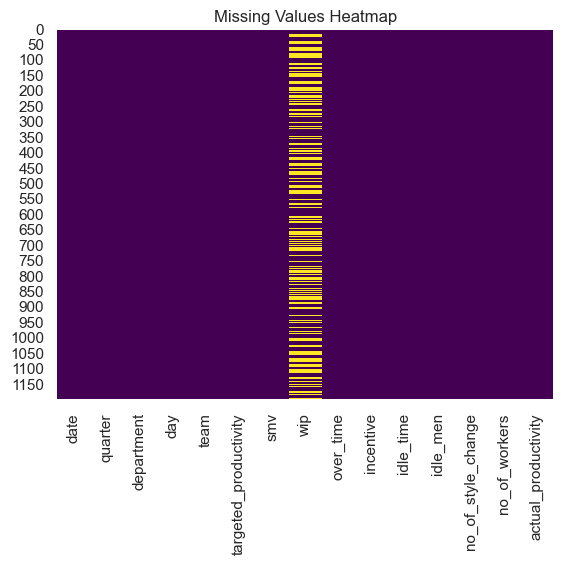

In [233]:
# See how many missing values are in each column
print(df.isnull().sum())

# Optionally visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()



In [242]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check for any rows where date conversion failed
print("Rows with invalid date:", df['date'].isnull().sum())

# Extract date features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()  # Full weekday name like 'Monday'

# Optional: Check first few rows to verify
print(df[['date', 'year', 'month', 'day', 'weekday']].head())


Rows with invalid date: 0
        date  year  month  day   weekday
0 2015-01-01  2015      1    1  Thursday
1 2015-01-01  2015      1    1  Thursday
2 2015-01-01  2015      1    1  Thursday
3 2015-01-01  2015      1    1  Thursday
4 2015-01-01  2015      1    1  Thursday


In [251]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract month from date
df['month'] = df['date'].dt.month

# Drop the original date column
df.drop(columns=['date'], inplace=True)

# Clean department column: remove spaces, lowercase all
df['department'] = df['department'].str.strip().str.lower()

# Merge duplicate 'finishing' entries (if needed, standardize)
df['department'] = df['department'].replace({'finishing': 'Finishing', 'sewing': 'Sewing'})

# Optional: check unique departments
print("Unique departments:", df['department'].unique())


Unique departments: ['sweing' 'Finishing']


In [253]:
from sklearn.preprocessing import LabelEncoder

# Define MultiColumnLabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns
        self.encoders = {}

    def fit(self, X, y=None):
        for col in self.columns:
            le = LabelEncoder()
            le.fit(X[col])
            self.encoders[col] = le
        return self

    def transform(self, X):
        output = X.copy()
        for col in self.columns:
            output[col] = self.encoders[col].transform(X[col])
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)

# Columns to encode
cat_cols = ['quarter', 'department', 'day']

# Encode
encoder = MultiColumnLabelEncoder(columns=cat_cols)
df = encoder.fit_transform(df)

# Confirm encoding
print(df[cat_cols].head())


   quarter  department  day
0        0           1    0
1        0           0    0
2        0           1    0
3        0           1    0
4        0           1    0


In [255]:
# Summary of Steps:
# Split the dataset into:

# X → features (independent variables)

# y → target (dependent variable)

# Convert X to array format (optional but mentioned in instruction).

# Use train_test_split() from sklearn.



In [257]:
from sklearn.model_selection import train_test_split

# Define target column
target = 'actual_productivity'

# Create X (features) and y (target)
X = df.drop(columns=[target])
y = df[target]

# Convert X to array format
X_array = X.values

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_array, y, test_size=0.2, random_state=42
)

# Optional: print shape of splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (957, 17)
X_test shape: (240, 17)
y_train shape: (957,)
y_test shape: (240,)


In [261]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(957, 17) (240, 17) (957,) (240,)


In [265]:
print(df.dtypes)


quarter                    int32
department                 int32
day                        int64
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
year                       int32
month                      int32
weekday                   object
department_encoded         int32
dtype: object


In [267]:
from sklearn.preprocessing import LabelEncoder

# Define MultiColumnLabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns
        self.encoders = {}

    def fit(self, X, y=None):
        for col in self.columns:
            le = LabelEncoder()
            le.fit(X[col])
            self.encoders[col] = le
        return self

    def transform(self, X):
        output = X.copy()
        for col in self.columns:
            output[col] = self.encoders[col].transform(X[col])
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)

# Encode 'quarter', 'department', 'day'
cat_cols = ['quarter', 'department', 'day']
encoder = MultiColumnLabelEncoder(columns=cat_cols)
df = encoder.fit_transform(df)


In [269]:
print(df.dtypes)  # all should be int or float


quarter                    int64
department                 int64
day                        int64
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
year                       int32
month                      int32
weekday                   object
department_encoded         int32
dtype: object


In [273]:
# Label encode weekday column
le = LabelEncoder()
df['weekday'] = le.fit_transform(df['weekday'])


In [275]:
print(df.dtypes)

quarter                    int64
department                 int64
day                        int64
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
year                       int32
month                      int32
weekday                    int64
department_encoded         int32
dtype: object


In [277]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define target
target = 'actual_productivity'

# X and y
X = df.drop(columns=[target])
y = df[target]

# Convert X to array
X_array = X.values

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_array, y, test_size=0.2, random_state=42
)

# Train model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predict
pred_test = model_lr.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
r2 = r2_score(y_test, pred_test)

print("Linear Regression Performance:")
print("MAE:", round(mae, 4))
print("MSE:", round(mse, 4))
print("R² Score:", round(r2, 4))


Linear Regression Performance:
MAE: 0.1074
MSE: 0.0214
R² Score: 0.1958


In [279]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Decision Tree Regressor
model_dt = DecisionTreeRegressor(random_state=42)

# Train the model
model_dt.fit(X_train, y_train)

# Predict on test data
pred_test_dt = model_dt.predict(X_test)

# Evaluate the model
mae_dt = mean_absolute_error(y_test, pred_test_dt)
mse_dt = mean_squared_error(y_test, pred_test_dt)
r2_dt = r2_score(y_test, pred_test_dt)

# Print the performance
print("Decision Tree Regressor Performance:")
print("Mean Absolute Error (MAE):", round(mae_dt, 4))
print("Mean Squared Error (MSE):", round(mse_dt, 4))
print("R² Score:", round(r2_dt, 4))


Decision Tree Regressor Performance:
Mean Absolute Error (MAE): 0.0853
Mean Squared Error (MSE): 0.0225
R² Score: 0.1519


In [281]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Predict on test data
pred_test_rf = model_rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, pred_test_rf)
mse_rf = mean_squared_error(y_test, pred_test_rf)
r2_rf = r2_score(y_test, pred_test_rf)

# Print metrics
print("Random Forest Regressor Performance:")
print("Mean Absolute Error (MAE):", round(mae_rf, 4))
print("Mean Squared Error (MSE):", round(mse_rf, 4))
print("R² Score:", round(r2_rf, 4))


Random Forest Regressor Performance:
Mean Absolute Error (MAE): 0.0682
Mean Squared Error (MSE): 0.0114
R² Score: 0.57


In [283]:
import pandas as pd
import joblib

# Create a summary DataFrame of all models
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MAE": [0.1074, 0.0853, 0.0682],
    "MSE": [0.0214, 0.0225, 0.0114],
    "R2_Score": [0.1958, 0.1519, 0.57]
})

print(results)

# Save the best model (Random Forest) to disk
best_model = model_rf  # your Random Forest model variable
joblib.dump(best_model, "best_model_rf.joblib")
print("Best model saved as 'best_model_rf.joblib'")


               Model     MAE     MSE  R2_Score
0  Linear Regression  0.1074  0.0214    0.1958
1      Decision Tree  0.0853  0.0225    0.1519
2      Random Forest  0.0682  0.0114    0.5700
Best model saved as 'best_model_rf.joblib'


In [293]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [295]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize XGBoost Regressor
model_xgb = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')

# Train the model
model_xgb.fit(X_train, y_train)

# Predict on test data
pred3 = model_xgb.predict(X_test)

# Evaluate performance
mae_xgb = mean_absolute_error(y_test, pred3)
mse_xgb = mean_squared_error(y_test, pred3)
r2_xgb = r2_score(y_test, pred3)

print("XGBoost Regressor Performance:")
print("Mean Absolute Error (MAE):", round(mae_xgb, 4))
print("Mean Squared Error (MSE):", round(mse_xgb, 4))
print("R² Score:", round(r2_xgb, 4))


XGBoost Regressor Performance:
Mean Absolute Error (MAE): 0.0727
Mean Squared Error (MSE): 0.0132
R² Score: 0.5023


In [297]:
import pandas as pd
import joblib

# Store performance metrics for all models
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "XGBoost"],
    "MAE": [0.1074, 0.0853, 0.0682, 0.0727],
    "MSE": [0.0214, 0.0225, 0.0114, 0.0132],
    "R2_Score": [0.1958, 0.1519, 0.57, 0.5023]
})

# Display comparison table
print("Model Performance Comparison:\n")
print(results)

# Find best model based on highest R2 score
best_index = results['R2_Score'].idxmax()
best_model_name = results.loc[best_index, 'Model']

print(f"\nBest performing model based on R² Score is: {best_model_name}")

# Save the best model accordingly
if best_model_name == "Linear Regression":
    joblib.dump(model_lr, "best_model.joblib")
elif best_model_name == "Decision Tree":
    joblib.dump(model_dt, "best_model.joblib")
elif best_model_name == "Random Forest":
    joblib.dump(model_rf, "best_model.joblib")
else:  # XGBoost
    joblib.dump(model_xgb, "best_model.joblib")

print(f"Best model ({best_model_name}) saved as 'best_model.joblib'")


Model Performance Comparison:

               Model     MAE     MSE  R2_Score
0  Linear Regression  0.1074  0.0214    0.1958
1      Decision Tree  0.0853  0.0225    0.1519
2      Random Forest  0.0682  0.0114    0.5700
3            XGBoost  0.0727  0.0132    0.5023

Best performing model based on R² Score is: Random Forest
Best model (Random Forest) saved as 'best_model.joblib'


In [299]:
import joblib

# Suppose you have identified the best model name (e.g., from your comparison)
best_model_name = "Random Forest"  # Change this based on your comparison results

# Map model names to your trained model variables
models = {
    "Linear Regression": model_lr,
    "Decision Tree": model_dt,
    "Random Forest": model_rf,
    "XGBoost": model_xgb
}

# Save the best model to disk
joblib.dump(models[best_model_name], "best_model.joblib")

print(f"Best model ({best_model_name}) saved as 'best_model.joblib'")


Best model (Random Forest) saved as 'best_model.joblib'


In [301]:
from sklearn.metrics import r2_score
import pickle

# 1. Evaluate the model performance
r2 = r2_score(y_test, pred3)
print(f"R2 Score of the model: {r2:.4f}")

# 2. Save the trained model to a file using pickle
with open("best_model.pkl", "wb") as file:
    pickle.dump(model_xgb, file)

print("Model saved successfully as 'best_model.pkl'")

# 3. (Optional) Load the model later to use
# with open("best_model.pkl", "rb") as file:
#     loaded_model = pickle.load(file)
# 
# # Predict new data
# predictions = loaded_model.predict(X_new)


R2 Score of the model: 0.5023
Model saved successfully as 'best_model.pkl'


In [305]:
import pickle

# मान लीजिए Random Forest सबसे अच्छा चला था:
pickle.dump(model_rf, open('model.pkl', 'wb'))


In [307]:
pickle.dump(model_rf, open('model.pkl', 'wb'))
print("Model saved successfully!")


Model saved successfully!


In [309]:
import pickle

# मॉडल को सेव करें (example: Random Forest model)
with open('model.pkl', 'wb') as f:
    pickle.dump(model_rf, f)
print("Model saved successfully!")


Model saved successfully!


In [311]:
import pickle

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

print(model)  # या model की type देखें


RandomForestRegressor(random_state=42)


In [313]:
from sklearn.ensemble import RandomForestRegressor

# मॉडल बनाएं
model_rf = RandomForestRegressor(random_state=42)

# डेटा पर ट्रेन करें (यहां X_train, y_train पहले से होना चाहिए)
model_rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [314]:
import pickle

# मॉडल को उसी session में pickle करें, जहां model_rf defined है
with open('model.pkl', 'wb') as f:
    pickle.dump(model_rf, f)

print("Model saved successfully!")


Model saved successfully!


In [317]:
import pickle

# मान लीजिए model_rf आपका ट्रेंड किया हुआ मॉडल है
with open('model.pkl', 'wb') as file:
    pickle.dump(model_rf, file)

print("Model saved successfully!")


Model saved successfully!


In [319]:
import os
print(os.getcwd())


C:\Users\JAYANT\smart_internz_project
